In [85]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [86]:
# Read in the post-processed file
d = pd.read_csv("combined.csv")

In [87]:
d.head()

,Unnamed: 0,i,itr,dvfs,rate,policy,nmappers,watts_avg,watts_std,pollCnt,...,MappernumRecordsInPerSecond_avg,MappernumRecordsInPerSecond_std,MappernumRecordsOutPerSecond_avg,MappernumRecordsOutPerSecond_std,MapperbusyTimeMsPerSecond_avg,MapperbusyTimeMsPerSecond_std,MapperbackPressuredTimeMsPerSecond_avg,MapperbackPressuredTimeMsPerSecond_std,MapperbusyTime_%,MapperbackPressuredTime_%
0,0,0,1,1,100000,ondemand,4,45.89,5.30,2163,...,383953.551563,4480.253814,383953.536458,4480.257006,943.312500,38.310594,0.0,0.0,94.331250,0.0
1,1,1,1,1,100000,ondemand,4,40.53,2.76,2030,...,398803.451649,1897.757368,398803.455122,1897.758963,895.635417,39.941088,0.0,0.0,89.563542,0.0
2,2,2,1,1,100000,ondemand,4,40.77,2.84,2171,...,398922.675608,1261.829813,398922.673177,1261.831400,897.718750,40.694036,0.0,0.0,89.771875,0.0
3,3,3,1,1,100000,ondemand,4,40.80,3.06,2208,...,398024.918576,2245.674831,398024.923698,2245.672810,893.062500,40.803790,0.0,0.0,89.306250,0.0
4,4,0,1,1,100000,ondemand,8,31.82,0.98,2501,...,199980.960851,27.206161,199980.961415,27.203393,642.315104,27.558340,0.0,0.0,64.231510,0.0


In [88]:
d.columns

Index(['Unnamed: 0', 'i', 'itr', 'dvfs', 'rate', 'policy', 'nmappers',
       'watts_avg', 'watts_std', 'pollCnt', 'c1Cnt', 'c1eCnt', 'c3Cnt',
       'c6Cnt', 'rxPackets', 'rxBytes', 'txPackets', 'txBytes', 'erxPackets',
       'erxBytes', 'etxPackets', 'etxBytes', 'SinknumRecordsInPerSecond_avg',
       'SinknumRecordsInPerSecond_std', 'SinknumRecordsOutPerSecond_avg',
       'SinknumRecordsOutPerSecond_std', 'SinkbusyTimeMsPerSecond_avg',
       'SinkbusyTimeMsPerSecond_std', 'SinkbackPressuredTimeMsPerSecond_avg',
       'SinkbackPressuredTimeMsPerSecond_std', 'SinkbusyTime_%',
       'SinkbackPressuredTime_%', 'SourcenumRecordsInPerSecond_avg',
       'SourcenumRecordsInPerSecond_std', 'SourcenumRecordsOutPerSecond_avg',
       'SourcenumRecordsOutPerSecond_std', 'SourcebusyTimeMsPerSecond_avg',
       'SourcebusyTimeMsPerSecond_std',
       'SourcebackPressuredTimeMsPerSecond_avg',
       'SourcebackPressuredTimeMsPerSecond_std', 'SourcebusyTime_%',
       'SourcebackPressuredTime

# 1) Validating Backpressure

### In the following set of analysis, we select the results from iteration (i==1). We look at two backpressure values, from the Sink and the Mapper in order to ensure they are close to 0%, indicating that the Flink system is not overloaded

In [89]:
d[(d.i==1)][['policy', 'nmappers', 'rate', 'SourcenumRecordsOutPerSecond_avg', 'SinkbackPressuredTimeMsPerSecond_avg', 'MapperbackPressuredTime_%']]

,policy,nmappers,rate,SourcenumRecordsOutPerSecond_avg,SinkbackPressuredTimeMsPerSecond_avg,MapperbackPressuredTime_%
1,ondemand,4,100000,99708.906055,0.0,0.000000
5,ondemand,8,100000,99980.324643,0.0,0.000000
9,ondemand,12,100000,100000.000000,0.0,0.000000
13,ondemand,16,100000,99986.832682,0.0,8.210547
17,ondemand,4,200000,107103.205425,0.0,0.000000
21,ondemand,8,200000,198081.822635,0.0,0.000000
25,ondemand,12,200000,199963.498394,0.0,0.000000
29,ondemand,16,200000,199963.187977,0.0,0.000391
33,ondemand,4,300000,110526.734180,0.0,0.000000
37,ondemand,8,300000,194377.787739,0.0,0.000000


# 2) Validating Source Records-Per-Second Out is equal to Rate

### Another important thing to validate is that the Records-Per-Second rate generated by Sources is roughly equal to the benchmark input Rate. In particular, `SourcenumRecordsOutPerSecond_avg` should be roughly equal to `rate`

In [90]:
# Here we filter out out all points where the SourcenumRecordsOutPerSecond_avg is not within 95% of the input Rate
d2 = d[d['SourcenumRecordsOutPerSecond_avg'] >= (d['rate'] * 0.95)]

In [91]:
d2[(d2.i==1)][['policy', 'nmappers', 'rate', 'SourcenumRecordsOutPerSecond_avg', 'SinkbackPressuredTimeMsPerSecond_avg', 'MapperbackPressuredTime_%']]

,policy,nmappers,rate,SourcenumRecordsOutPerSecond_avg,SinkbackPressuredTimeMsPerSecond_avg,MapperbackPressuredTime_%
1,ondemand,4,100000,99708.906055,0.0,0.000000
5,ondemand,8,100000,99980.324643,0.0,0.000000
9,ondemand,12,100000,100000.000000,0.0,0.000000
13,ondemand,16,100000,99986.832682,0.0,8.210547
21,ondemand,8,200000,198081.822635,0.0,0.000000
25,ondemand,12,200000,199963.498394,0.0,0.000000
29,ondemand,16,200000,199963.187977,0.0,0.000391
41,ondemand,12,300000,297603.016363,0.0,0.000000
45,ondemand,16,300000,299982.453212,0.0,0.001693
61,ondemand,16,400000,398418.289822,0.0,0.004297


# 3) Power analysis over different mappers

Text(0.5, 1.0, 'Query1 Power Analysis')

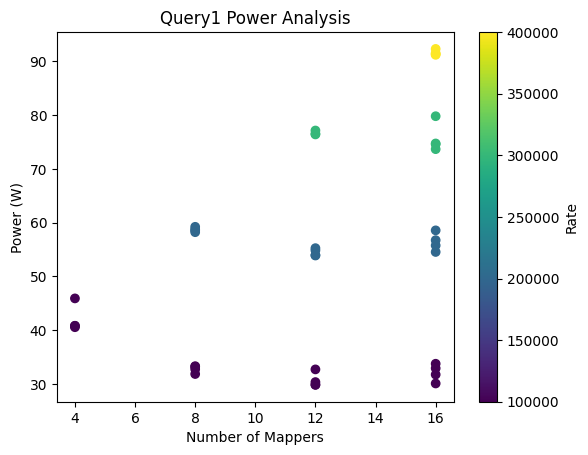

In [94]:
plt.scatter(d2['nmappers'], d2['watts_avg'], c=d2['rate'], cmap='viridis')
plt.colorbar(label='Rate')
plt.xlabel('Number of Mappers')
plt.ylabel('Power (W)')
plt.title('Query1 Power Analysis')

### From the figure above, we can see an interesting behavior with Flink for Query 1 where as the number of mappers increase from 4 to 16, we can see the amount of power used actually decrease. Which suggests there are operating points at which different Rates can run using less power than expected. Specifically, one can also notice that with 12 mappers actually results in the lowest amount of power used overall.